In [3]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Generating samples and parsing parameters scan file



In [4]:
from GENE_ML.gene_ml.samplers.uniform import Uniform
from GENE_ML.gene_ml.executors.ScanExecutor import ScanExecutor
from GENE_ML.gene_ml.runners.GENErunner import GENErunner
from GENE_ML.gene_ml.parsers.GENEparser import GENE_scan_parser

import os
import sys
sys.path.append(os.path.join(os.getcwd(),'GENE_ML','enchanted-surrogates','src'))

# omn is made the same for all species to keep quasineutrality, only works when there are 2 species. 
parameters = ['box-kymin', '_grp_species_1-omt', '_grp_species_0-omt', 'species-omn', 'geometry-q0', 'geometry-shat', 'general-beta']
bounds = [(0.05,1), (10,70), (10,70), (5,60), (3,6), (0.001,4), (0.1E-2,0.4E-2)]

#Working fine
# parameters = ['box-kymin', '_grp_species_1-omt', 'species-omn']
# bounds = [(0.05,1), (10,70), (5,60)]

num_samples = 40
sampler = Uniform(parameters=parameters, bounds=bounds, num_samples=num_samples)

##Parser
#The parsers main function is write_input_file
# wite_input_file takes a parameters file from base_params_path and a set of points in the form of a dict {param1:[point1,point2...], param2:[point1,point2...]...} 
#  It will then create a parameters file that can scan over all the points.
base_params_path = os.path.join(os.getcwd(),'parameters_base_dp')
remote_save_dir='/scratch/project_462000451/gene_out/gene_auto/nan100'
save_dir = "temp/"
parser = GENE_scan_parser(save_dir, base_params_path, remote_save_dir)

## Runner
#The Runner is responsible for actually running a parameters file on lumi. Its main function is code_run.
# code_run will take the set of points named samples and parse them into a parameters file.
#  It then uses ssh to run GENE with this parametres file and a passed sbatch script.
host = 'lumi3' #needs to be configured in /home/<user>/.ssh/config
sbatch_base_path = os.path.join('sbatch_base_dp')
guess_sample_wallseconds = 200 # a guess for the number of seconds it takes to run one sample.
remote_run_dir = '/project/project_462000451/gene/'
runner = GENErunner(parser, host, sbatch_base_path, guess_sample_wallseconds, remote_run_dir)

##Executor
#The executor will divide the samples into batches; one for each worker. Each batch will be ran in paralell in seperate sbatch jobs. 
# The executor should alter a base batch script to account for that less samples will be ran. 
num_workers = 2
executor = ScanExecutor(num_workers, sampler, runner, remote_save_dir=remote_save_dir)

In [26]:
#executor.start_runs()

CLEANING RUN DIR OF RUNER CREATED DIRECTORIES


rm: cannot remove 'auto_prob_*': No such file or directory
rm: cannot remove 'prob0*': No such file or directory


EXECUTING BATCHES
Writing to /home/djdaniel/DEEPlasma/parameters_base_dp
Writing to /home/djdaniel/DEEPlasma/parameters_base_dp
PARSING SAMPLES TO INPUT FILE at temp/parameters_0
Writing to temp/
GENERATING SBATCH FROM PARAMETERS FILE at temp/sbatch_0
WALL CLOCK LIMIT FOR BATCH 0:   00-01:26:40
CREATING A NEW PROBLEM DIR WITH SSH
MOVING PARAMETERS AND SBATCH FILES TO CORRECT LOCATION IN REMOTE; SUBMITTING GENE SBATCH
set lib path in ./tools/scanscript
set lib path in ./tools/scanscript
created prob01
copied parameters
created link to the GENE executable in the bin directory
Submitted batch job 7702858
Writing to /home/djdaniel/DEEPlasma/parameters_base_dp
Writing to /home/djdaniel/DEEPlasma/parameters_base_dp
PARSING SAMPLES TO INPUT FILE at temp/parameters_1
Writing to temp/
GENERATING SBATCH FROM PARAMETERS FILE at temp/sbatch_1
WALL CLOCK LIMIT FOR BATCH 1:   00-01:26:40
CREATING A NEW PROBLEM DIR WITH SSH
MOVING PARAMETERS AND SBATCH FILES TO CORRECT LOCATION IN REMOTE; SUBMITTING 

# Pulling Scanlog from Lumi 

In [3]:
from GENE_ML.gene_ml.dataset.ScanData import ScanData
import os
host = 'lumi'
data_name = 'nan100'
test_percentage = 50

data_set_orig = ScanData(data_name, parser, host=host, remote_path=remote_save_dir,  test_percentage=test_percentage)


Initialising dataset
SSH PATH lumi:/scratch/project_462000451/gene_out/gene_auto/nan100
MAKING SCANLOG DIR
RETRIEVING REMOTE SCANLOG FILES

RETRIEVING SCANLOG/S VIA scp FROM REMOTE
SCANLOG PATH: lumi:/scratch/project_462000451/gene_out/gene_auto/nan100
RETRIVING FROM REMOTE DIR
[0]


scp: /scratch/project_462000451/gene_out/gene_auto/nan100/batch*0/scanfiles*1/scan.log: No such file or directory


[0, 256]


scp: /scratch/project_462000451/gene_out/gene_auto/nan100/batch*0/scanfiles*2/scan.log: No such file or directory


[0, 256, 256]


scp: /scratch/project_462000451/gene_out/gene_auto/nan100/batch*0/scanfiles*3/scan.log: No such file or directory


[0, 256, 256, 256]
[0, 256, 256, 256, 0]


scp: /scratch/project_462000451/gene_out/gene_auto/nan100/batch*1/scanfiles*1/scan.log: No such file or directory


[0, 256, 256, 256, 0, 256]


scp: /scratch/project_462000451/gene_out/gene_auto/nan100/batch*1/scanfiles*2/scan.log: No such file or directory


[0, 256, 256, 256, 0, 256, 256]


scp: /scratch/project_462000451/gene_out/gene_auto/nan100/batch*1/scanfiles*3/scan.log: No such file or directory


[0, 256, 256, 256, 0, 256, 256, 256]


scp: /scratch/project_462000451/gene_out/gene_auto/nan100/batch*2/scanfiles*0/scan.log: No such file or directory


[0, 256, 256, 256, 0, 256, 256, 256, 256]


scp: /scratch/project_462000451/gene_out/gene_auto/nan100/batch*3/scanfiles*0/scan.log: No such file or directory


[0, 256, 256, 256, 0, 256, 256, 256, 256, 256]


In [26]:
import numpy as np
df = data_set_orig.df_inc_nan
n_nans=np.sum(df['growthrate']=='NaN')
print(f'{n_nans} out of 100 in origional data set')



50 out of 100 in origional data set


In [27]:
data_set_orig.ssh_path

'lumi:/scratch/project_462000451/gene_out/gene_auto/nan100'

In [28]:
# looking for underflow
data_set_orig.retrieve_out_file(fname='geneerr.log')

#using control f I found no underflow in the geneerr.log files. SO I think there are no stable runs causing nan's


RETRIEVING geneerr.log VIA scp FROM REMOTE
[0]


scp: /scratch/project_462000451/gene_out/gene_auto/nan100/batch*0/scanfiles*1/geneerr.log: No such file or directory


[0, 256]


scp: /scratch/project_462000451/gene_out/gene_auto/nan100/batch*0/scanfiles*2/geneerr.log: No such file or directory


[0, 256, 256]


scp: /scratch/project_462000451/gene_out/gene_auto/nan100/batch*0/scanfiles*3/geneerr.log: No such file or directory


[0, 256, 256, 256]
[0, 256, 256, 256, 0]


scp: /scratch/project_462000451/gene_out/gene_auto/nan100/batch*1/scanfiles*1/geneerr.log: No such file or directory


[0, 256, 256, 256, 0, 256]


scp: /scratch/project_462000451/gene_out/gene_auto/nan100/batch*1/scanfiles*2/geneerr.log: No such file or directory


[0, 256, 256, 256, 0, 256, 256]


scp: /scratch/project_462000451/gene_out/gene_auto/nan100/batch*1/scanfiles*3/geneerr.log: No such file or directory


[0, 256, 256, 256, 0, 256, 256, 256]
[0, 256, 256, 256, 0, 256, 256, 256, 0]


scp: /scratch/project_462000451/gene_out/gene_auto/nan100/batch*2/scanfiles*1/geneerr.log: No such file or directory


[0, 256, 256, 256, 0, 256, 256, 256, 0, 256]


scp: /scratch/project_462000451/gene_out/gene_auto/nan100/batch*2/scanfiles*2/geneerr.log: No such file or directory


[0, 256, 256, 256, 0, 256, 256, 256, 0, 256, 256]


scp: /scratch/project_462000451/gene_out/gene_auto/nan100/batch*2/scanfiles*3/geneerr.log: No such file or directory


[0, 256, 256, 256, 0, 256, 256, 256, 0, 256, 256, 256]
[0, 256, 256, 256, 0, 256, 256, 256, 0, 256, 256, 256, 0]


scp: /scratch/project_462000451/gene_out/gene_auto/nan100/batch*3/scanfiles*1/geneerr.log: No such file or directory


[0, 256, 256, 256, 0, 256, 256, 256, 0, 256, 256, 256, 0, 256]


scp: /scratch/project_462000451/gene_out/gene_auto/nan100/batch*3/scanfiles*2/geneerr.log: No such file or directory


[0, 256, 256, 256, 0, 256, 256, 256, 0, 256, 256, 256, 0, 256, 256]


scp: /scratch/project_462000451/gene_out/gene_auto/nan100/batch*3/scanfiles*3/geneerr.log: No such file or directory


[0, 256, 256, 256, 0, 256, 256, 256, 0, 256, 256, 256, 0, 256, 256, 256]
[0, 256, 256, 256, 0, 256, 256, 256, 0, 256, 256, 256, 0, 256, 256, 256, 0]


scp: /scratch/project_462000451/gene_out/gene_auto/nan100/batch*4/scanfiles*1/geneerr.log: No such file or directory


[0, 256, 256, 256, 0, 256, 256, 256, 0, 256, 256, 256, 0, 256, 256, 256, 0, 256]


scp: /scratch/project_462000451/gene_out/gene_auto/nan100/batch*4/scanfiles*2/geneerr.log: No such file or directory


[0, 256, 256, 256, 0, 256, 256, 256, 0, 256, 256, 256, 0, 256, 256, 256, 0, 256, 256]


scp: /scratch/project_462000451/gene_out/gene_auto/nan100/batch*4/scanfiles*3/geneerr.log: No such file or directory


[0, 256, 256, 256, 0, 256, 256, 256, 0, 256, 256, 256, 0, 256, 256, 256, 0, 256, 256, 256]


scp: /scratch/project_462000451/gene_out/gene_auto/nan100/batch*5/scanfiles*0/geneerr.log: No such file or directory


[0, 256, 256, 256, 0, 256, 256, 256, 0, 256, 256, 256, 0, 256, 256, 256, 0, 256, 256, 256, 256]


scp: /scratch/project_462000451/gene_out/gene_auto/nan100/batch*6/scanfiles*0/geneerr.log: No such file or directory


[0, 256, 256, 256, 0, 256, 256, 256, 0, 256, 256, 256, 0, 256, 256, 256, 0, 256, 256, 256, 256, 256]
[0, 256, 256, 256, 0, 256, 256, 256, 0, 256, 256, 256, 0, 256, 256, 256, 0, 256, 256, 256, 256, 256, 256]
THE ABOVE ERROR IS EXPECTED
ALL geneerr.log RETRIEVED AND SAVED TO:/home/djdaniel/DEEPlasma/out_files/nan_100_orig/geneerr.log


scp: /scratch/project_462000451/gene_out/gene_auto/nan100/batch*7/scanfiles*0/geneerr.log: No such file or directory


# To reduce NaN's I:

JUst needed to set the timelim and simtimelim to the walclock time lim to remove limitations. 



# Making Surrogate Model and Visualising Performance

# SVM

In [15]:

#imports
from GENE_ML.gene_ml.models.SVM import SVM
from GENE_ML.gene_ml.results.results import Results

results_svm_name = 'results_5000s_7p_svm_50tp' #
results_svm = Results(results_svm_name)

if os.path.exists(results_svm.path):
    print('\nLOADING RESULTS FROM FILE\n')
    results_svm = results_svm.load()
    print(f'{results_svm.name} IS LOADED')
else:
    print('\nCOMPUTING RESULTS\n')
    #Sampling already done, gene has been ran
    data_set = ScanData(name='5000s_7p', parser=parser, test_percentage=50)
    svm = SVM()
    svm.train(data_set.x_train, data_set.growthrate_train)
    
    results_svm.growthrate_predict_seen = svm.predict(data_set.x_train)
    results_svm.growthrate_predict_unseen = svm.predict(data_set.x_test)

    results_svm.save()


COMPUTING RESULTS

Initialising dataset

LOADING SCANLOG/S

LOADING SCANLOG INTO PYTHON /home/djdaniel/DEEPlasma/scanlogs/5000s_7p/scan___0.log

LOADING SCANLOG INTO PYTHON /home/djdaniel/DEEPlasma/scanlogs/5000s_7p/scan___1.log

LOADING SCANLOG INTO PYTHON /home/djdaniel/DEEPlasma/scanlogs/5000s_7p/scan___10.log

LOADING SCANLOG INTO PYTHON /home/djdaniel/DEEPlasma/scanlogs/5000s_7p/scan___11.log

LOADING SCANLOG INTO PYTHON /home/djdaniel/DEEPlasma/scanlogs/5000s_7p/scan___12.log

LOADING SCANLOG INTO PYTHON /home/djdaniel/DEEPlasma/scanlogs/5000s_7p/scan___13.log

LOADING SCANLOG INTO PYTHON /home/djdaniel/DEEPlasma/scanlogs/5000s_7p/scan___14.log

LOADING SCANLOG INTO PYTHON /home/djdaniel/DEEPlasma/scanlogs/5000s_7p/scan___15.log

LOADING SCANLOG INTO PYTHON /home/djdaniel/DEEPlasma/scanlogs/5000s_7p/scan___16.log

LOADING SCANLOG INTO PYTHON /home/djdaniel/DEEPlasma/scanlogs/5000s_7p/scan___17.log

LOADING SCANLOG INTO PYTHON /home/djdaniel/DEEPlasma/scanlogs/5000s_7p/scan___18.

NO UNCERTAINTY PROVIDED
NO UNCERTAINTY PROVIDED


 /tmp/ipykernel_128339/4032064780.py:18: UserWarning:FigureCanvasAgg is non-interactive, and thus cannot be shown


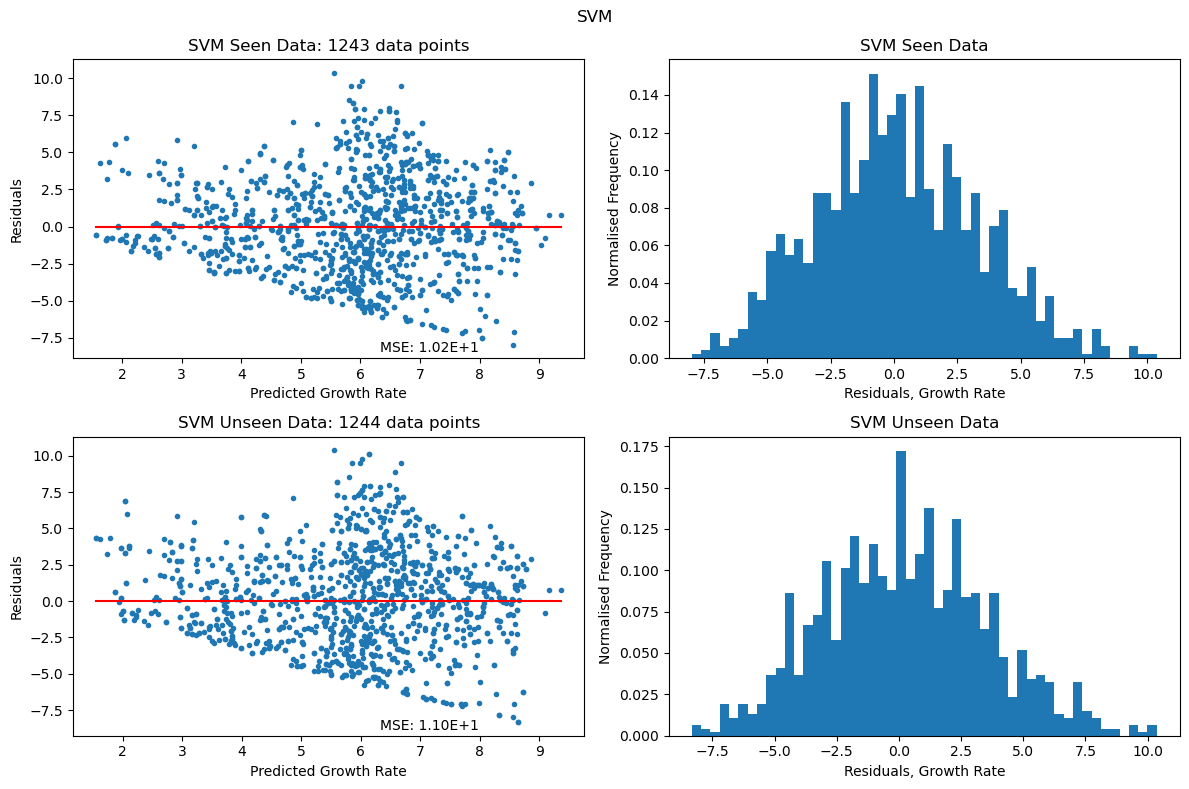

In [33]:
import matplotlib.pyplot as plt
from GENE_ML.gene_ml import visualise as vis
model_name = 'SVM'
ncol=2
nrow=2
width=6
height = 4
fig_residuals, [[ax1,ax2],[ax3,ax4]] = plt.subplots(nrow,ncol, figsize=(width*ncol,height*nrow), dpi=100)
    
vis.residual_plot(ax1, fig_residuals, data_set.growthrate_train, results_svm.growthrate_predict_seen, var_name='Growth Rate', title=f'{model_name} Seen Data')
vis.residual_hist(ax2, fig_residuals, data_set.growthrate_train, results_svm.growthrate_predict_seen, var_name='Growth Rate', title=f'{model_name} Seen Data')

vis.residual_plot(ax3, fig_residuals, data_set.growthrate_test, results_svm.growthrate_predict_unseen, var_name='Growth Rate', title=f'{model_name} Unseen Data')
vis.residual_hist(ax4, fig_residuals, data_set.growthrate_test, results_svm.growthrate_predict_unseen, var_name='Growth Rate', title=f'{model_name} Unseen Data')

fig_residuals.suptitle('SVM')
fig_residuals.tight_layout()
fig_residuals.show()



# GPR 5000s_7p

In [17]:
import os
import matplotlib.pyplot as plt
from GENE_ML.gene_ml.dataset.ScanData import ScanData
# #data_set = ScanData('3560_3p', ssh_path='lumi:$out/ped2_safescan/scanfiles0012/scan.log', test_percentage=50)
# data_set = ScanData('3560_3p', test_percentage=50)

#imports
from GENE_ML.gene_ml.models.GPR import GPR
from GENE_ML.gene_ml import visualise as vis
from GENE_ML.gene_ml.results.results import Results

#numsamples_numparameters_model_testpercentage
results_gpr_name = 'results_5000s_7p_gpr_50tp' #
results_gpr = Results(results_gpr_name)

if os.path.exists(results_gpr.path):
    print('\nLOADING RESULTS FROM FILE\n')
    results_gpr = results_gpr.load()
    print(f'{results_gpr.name} IS LOADED')
else:
    print('\nCOMPUTING RESULTS\n')
    #Sampling already done, gene has been ran
    data_set = ScanData(name='5000s_7p', parser=parser, test_percentage=50)
    gpr = GPR(name='5000s_7p_gpr.model')
    gpr.train(data_set.x_train, data_set.growthrate_train)
    gpr.tune_hypers(data_set.x_train, data_set.growthrate_train)

    results_gpr.growthrate_predict_seen, results_gpr.growthrate_predict_seen_errors = gpr.predict(data_set.x_train)
    results_gpr.growthrate_predict_unseen, results_gpr.growthrate_predict_unseen_errors = gpr.predict(data_set.x_test)

    results_gpr.save()


COMPUTING RESULTS

Initialising dataset

LOADING SCANLOG/S

LOADING SCANLOG INTO PYTHON /home/djdaniel/DEEPlasma/scanlogs/5000s_7p/scan___0.log

LOADING SCANLOG INTO PYTHON /home/djdaniel/DEEPlasma/scanlogs/5000s_7p/scan___1.log

LOADING SCANLOG INTO PYTHON /home/djdaniel/DEEPlasma/scanlogs/5000s_7p/scan___10.log

LOADING SCANLOG INTO PYTHON /home/djdaniel/DEEPlasma/scanlogs/5000s_7p/scan___11.log

LOADING SCANLOG INTO PYTHON /home/djdaniel/DEEPlasma/scanlogs/5000s_7p/scan___12.log

LOADING SCANLOG INTO PYTHON /home/djdaniel/DEEPlasma/scanlogs/5000s_7p/scan___13.log

LOADING SCANLOG INTO PYTHON /home/djdaniel/DEEPlasma/scanlogs/5000s_7p/scan___14.log

LOADING SCANLOG INTO PYTHON /home/djdaniel/DEEPlasma/scanlogs/5000s_7p/scan___15.log

LOADING SCANLOG INTO PYTHON /home/djdaniel/DEEPlasma/scanlogs/5000s_7p/scan___16.log

LOADING SCANLOG INTO PYTHON /home/djdaniel/DEEPlasma/scanlogs/5000s_7p/scan___17.log

LOADING SCANLOG INTO PYTHON /home/djdaniel/DEEPlasma/scanlogs/5000s_7p/scan___18.

 /home/djdaniel/anaconda3/envs/gene_ml/lib/python3.12/site-packages/GPy/kern/src/stationary.py:166: RuntimeWarning:overflow encountered in divide
 /home/djdaniel/anaconda3/envs/gene_ml/lib/python3.12/site-packages/GPy/kern/src/stationary.py:137: RuntimeWarning:overflow encountered in square
 /home/djdaniel/anaconda3/envs/gene_ml/lib/python3.12/site-packages/GPy/kern/src/stationary.py:138: RuntimeWarning:invalid value encountered in add


Optimization restart 1/3, f = 878.626348424317
Optimization restart 2/3, f = -1132.9523259597213
Optimization restart 3/3, f = -1132.9523262307562
RESULTING HYPERS:
 
Name : GP regression
Objective : -1132.9523262307562
Number of Parameters : 10
Number of Optimization Parameters : 10
Updates : True
Parameters:
  GP_regression.           |                   value  |  constraints  |  priors
  rbf.variance             |      19.396352214178805  |      +ve      |        
  rbf.lengthscale          |                    (8,)  |      +ve      |        
  Gaussian_noise.variance  |  1.2249268647911803e-19  |      +ve      |        
(1254, 1)
[[11.824     ]
 [10.20800003]
 [ 3.64200002]
 ...
 [11.93099998]
 [ 9.66700004]
 [ 8.51100002]]
(1254, 1)
[[ 6.92893507]
 [13.74799999]
 [ 3.2792312 ]
 ...
 [12.54875048]
 [ 5.27254389]
 [ 0.76000003]]


 /tmp/ipykernel_128339/1756795090.py:21: UserWarning:FigureCanvasAgg is non-interactive, and thus cannot be shown


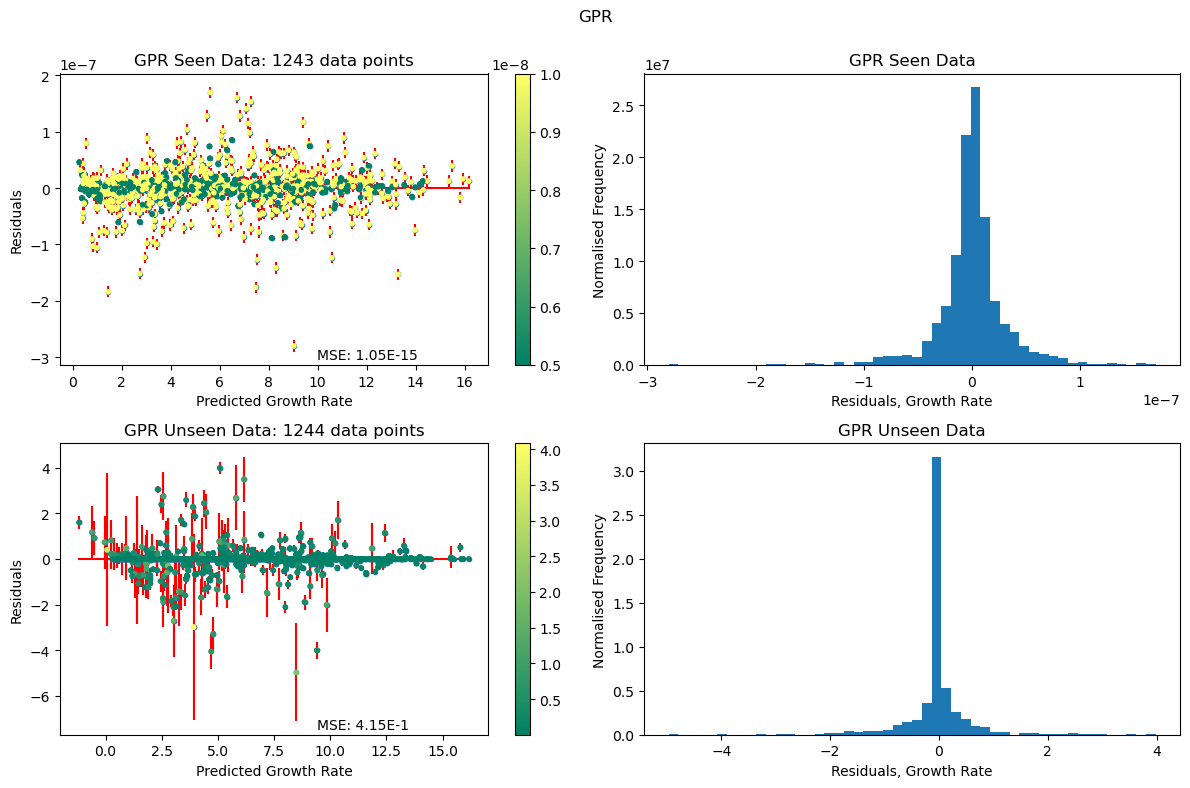

In [31]:
import matplotlib.pyplot as plt
from GENE_ML.gene_ml import visualise as vis

model_name = 'GPR'
ncol=2
nrow=2
width=6
height = 4
fig_residuals, [[ax1,ax2],[ax3,ax4]] = plt.subplots(nrow,ncol, figsize=(width*ncol,height*nrow), dpi=100)
    
vis.residual_plot(ax1, fig_residuals, data_set.growthrate_train, results_gpr.growthrate_predict_seen, var_name='Growth Rate', title=f'{model_name} Seen Data', y_pred_err=results_gpr.growthrate_predict_seen_errors)
vis.residual_hist(ax2, fig_residuals, data_set.growthrate_train, results_gpr.growthrate_predict_seen, var_name='Growth Rate', title=f'{model_name} Seen Data')

vis.residual_plot(ax3, fig_residuals, data_set.growthrate_test, results_gpr.growthrate_predict_unseen, var_name='Growth Rate', title=f'{model_name} Unseen Data', y_pred_err=results_gpr.growthrate_predict_unseen_errors)
vis.residual_hist(ax4, fig_residuals, data_set.growthrate_test, results_gpr.growthrate_predict_unseen, var_name='Growth Rate', title=f'{model_name} Unseen Data')

# ax4.sharex(ax2)

fig_residuals.suptitle(model_name)
fig_residuals.tight_layout()
fig_residuals.show()


# XGBoost 5000s_7p

In [18]:
import os
import matplotlib.pyplot as plt
from GENE_ML.gene_ml.dataset.ScanData import ScanData
# #data_set = ScanData('3560_3p', ssh_path='lumi:$out/ped2_safescan/scanfiles0012/scan.log', test_percentage=50)
# data_set = ScanData('3560_3p', test_percentage=50)

#imports
from GENE_ML.gene_ml.models.XGBoost import XGBoost
from GENE_ML.gene_ml import visualise as vis
from GENE_ML.gene_ml.results.results import Results

#numsamples_numparameters_model_testpercentage
results_xgb_name = 'results_5000s_7p_xgb_50tp' #
results_xgb = Results(results_xgb_name)

if os.path.exists(results_xgb.path):
    print('\nLOADING RESULTS FROM FILE\n')
    results_xgb = results_xgb.load()
    print(f'{results_xgb.name} IS LOADED')
else:
    print('\nCOMPUTING RESULTS\n')
    #Sampling already done, gene has been ran
    data_set = ScanData(name='5000s_7p', parser=parser, test_percentage=50)
    xgb = XGBoost()
    xgb.train(data_set.x_train, data_set.growthrate_train)
    results_xgb.growthrate_predict_seen = xgb.predict(data_set.x_train)
    results_xgb.growthrate_predict_unseen = xgb.predict(data_set.x_test)

    results_xgb.save()


COMPUTING RESULTS

Initialising dataset

LOADING SCANLOG/S

LOADING SCANLOG INTO PYTHON /home/djdaniel/DEEPlasma/scanlogs/5000s_7p/scan___0.log

LOADING SCANLOG INTO PYTHON /home/djdaniel/DEEPlasma/scanlogs/5000s_7p/scan___1.log

LOADING SCANLOG INTO PYTHON /home/djdaniel/DEEPlasma/scanlogs/5000s_7p/scan___10.log

LOADING SCANLOG INTO PYTHON /home/djdaniel/DEEPlasma/scanlogs/5000s_7p/scan___11.log

LOADING SCANLOG INTO PYTHON /home/djdaniel/DEEPlasma/scanlogs/5000s_7p/scan___12.log

LOADING SCANLOG INTO PYTHON /home/djdaniel/DEEPlasma/scanlogs/5000s_7p/scan___13.log

LOADING SCANLOG INTO PYTHON /home/djdaniel/DEEPlasma/scanlogs/5000s_7p/scan___14.log

LOADING SCANLOG INTO PYTHON /home/djdaniel/DEEPlasma/scanlogs/5000s_7p/scan___15.log

LOADING SCANLOG INTO PYTHON /home/djdaniel/DEEPlasma/scanlogs/5000s_7p/scan___16.log

LOADING SCANLOG INTO PYTHON /home/djdaniel/DEEPlasma/scanlogs/5000s_7p/scan___17.log

LOADING SCANLOG INTO PYTHON /home/djdaniel/DEEPlasma/scanlogs/5000s_7p/scan___18.

NO UNCERTAINTY PROVIDED
NO UNCERTAINTY PROVIDED


 /tmp/ipykernel_128339/3227161418.py:18: UserWarning:FigureCanvasAgg is non-interactive, and thus cannot be shown


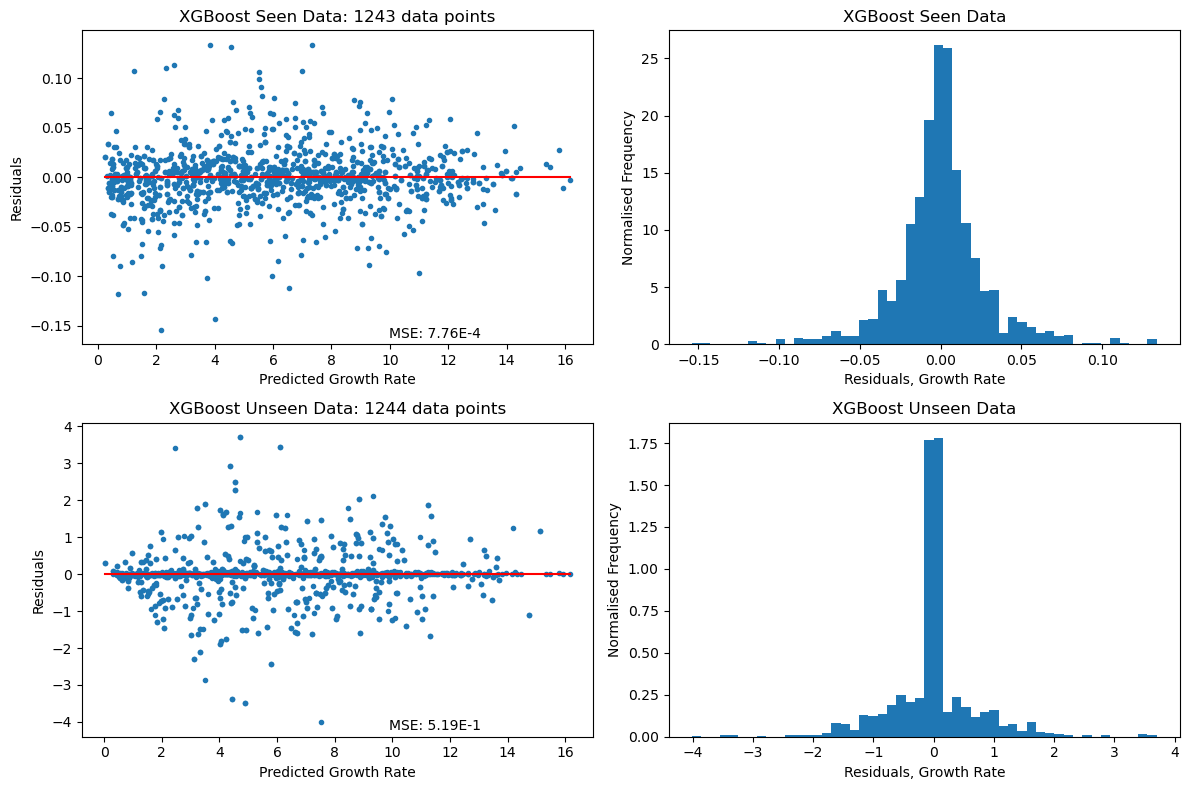

In [32]:
import matplotlib.pyplot as plt
from GENE_ML.gene_ml import visualise as vis
model_name = 'XGBoost'
ncol=2
nrow=2
width=6
height = 4
fig_residuals, [[ax1,ax2],[ax3,ax4]] = plt.subplots(nrow,ncol, figsize=(width*ncol,height*nrow), dpi=100)
    
vis.residual_plot(ax1, fig_residuals, data_set.growthrate_train, results_xgb.growthrate_predict_seen, var_name='Growth Rate', title=f'{model_name} Seen Data')
vis.residual_hist(ax2, fig_residuals, data_set.growthrate_train, results_xgb.growthrate_predict_seen, var_name='Growth Rate', title=f'{model_name} Seen Data')

vis.residual_plot(ax3, fig_residuals, data_set.growthrate_test, results_xgb.growthrate_predict_unseen, var_name='Growth Rate', title=f'{model_name} Unseen Data')
vis.residual_hist(ax4, fig_residuals, data_set.growthrate_test, results_xgb.growthrate_predict_unseen, var_name='Growth Rate', title=f'{model_name} Unseen Data')

# fig_residuals.suptitle('SVM')
fig_residuals.tight_layout()
fig_residuals.show()

# Comparison



NO UNCERTAINTY PROVIDED
NO UNCERTAINTY PROVIDED


 /tmp/ipykernel_34434/4269505862.py:21: UserWarning:FigureCanvasAgg is non-interactive, and thus cannot be shown


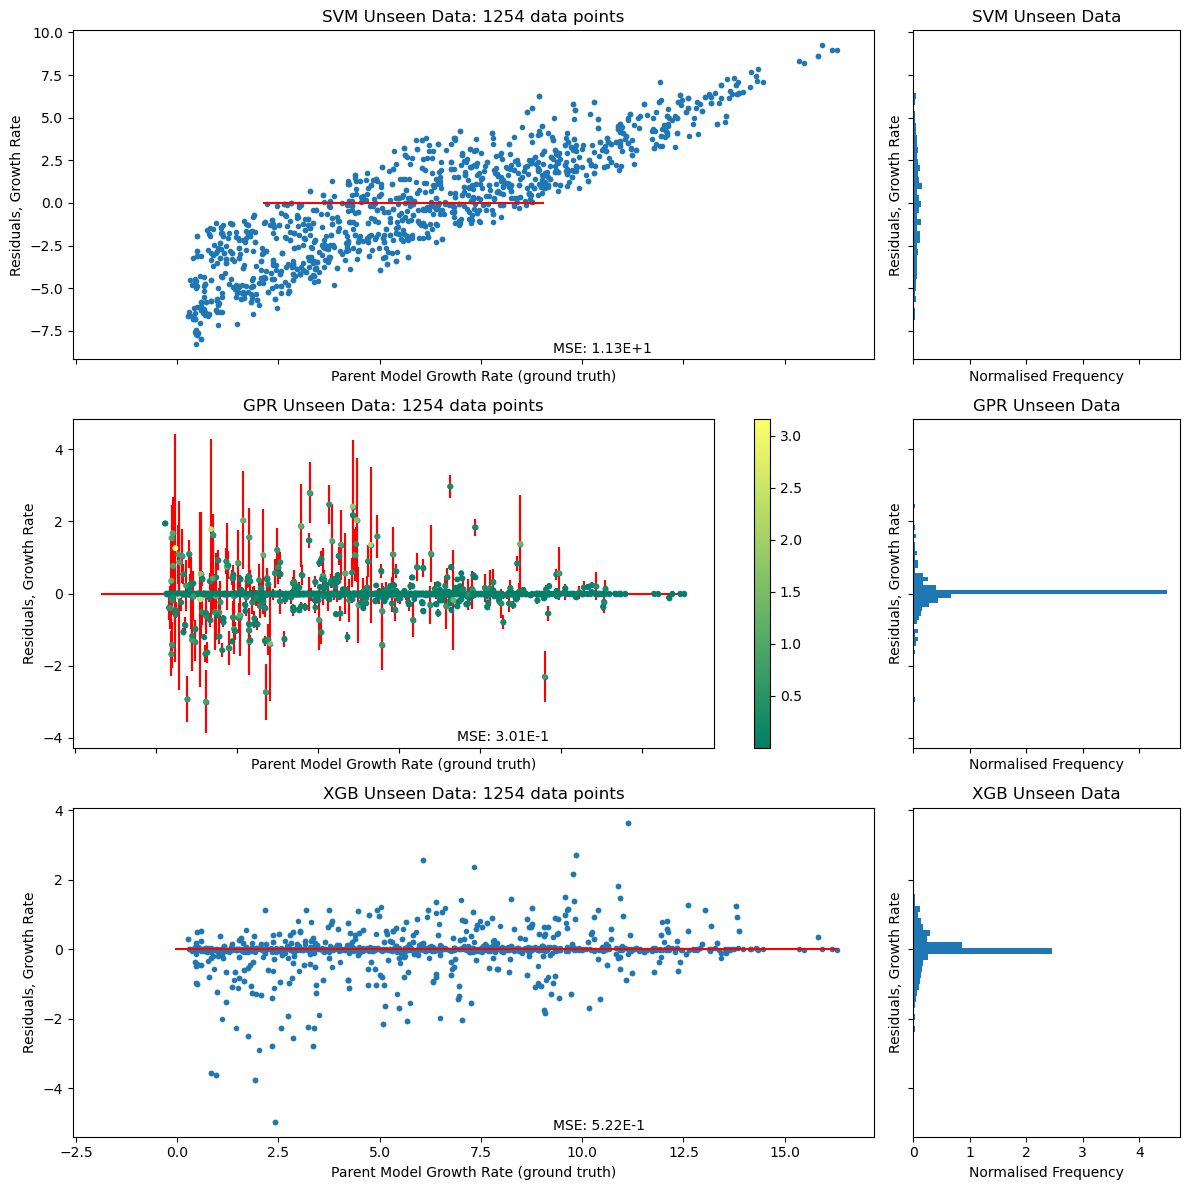

In [19]:
ncol=2
nrow=3
width=6
height = 4
fig_residuals, [[ax1,ax2],[ax3,ax4], [ax5,ax6]] = plt.subplots(nrow,ncol, width_ratios=[3,1], figsize=(width*ncol,height*nrow), dpi=100, sharex='col', sharey='row')


model_name='SVM'
vis.residual_plot(ax1, fig_residuals, data_set.growthrate_test, results_svm.growthrate_predict_unseen, var_name='Growth Rate', title=f'{model_name} Unseen Data')
vis.residual_hist(ax2, fig_residuals, data_set.growthrate_test, results_svm.growthrate_predict_unseen, var_name='Growth Rate', title=f'{model_name} Unseen Data')

model_name='GPR'
vis.residual_plot(ax3, fig_residuals, data_set.growthrate_test, results_gpr.growthrate_predict_unseen, var_name='Growth Rate', title=f'{model_name} Unseen Data', y_pred_err=results_gpr.growthrate_predict_unseen_errors)
vis.residual_hist(ax4, fig_residuals, data_set.growthrate_test, results_gpr.growthrate_predict_unseen, var_name='Growth Rate', title=f'{model_name} Unseen Data')

model_name='XGB'
vis.residual_plot(ax5, fig_residuals, data_set.growthrate_test, results_xgb.growthrate_predict_unseen, var_name='Growth Rate', title=f'{model_name} Unseen Data')
vis.residual_hist(ax6, fig_residuals, data_set.growthrate_test, results_xgb.growthrate_predict_unseen, var_name='Growth Rate', title=f'{model_name} Unseen Data')

fig_residuals.tight_layout()
fig_residuals.show()